**Libraries:**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier

# Applied Machine Learning - Final Project:
## Age Prediction using NHANES Data

**Team members:** Bruno Borges, Ingrid Passos, Thamiris Barcarolo.

## Project Objective:
This project aims to develop a machine learning model that predicts the age category ('Senior' or 'Adult') of individuals based on comprehensive health and nutrition data collected on the **National Health and Nutrition Examination Survey (NHANES) 2013-2014 survey**.Through careful analysis and modeling, we aim to provide a better assistent for healthcare professionals in understanding and addressing age-related health trends, resulting in the early identification of potential health issues that are particularly prevalent in different age groups.


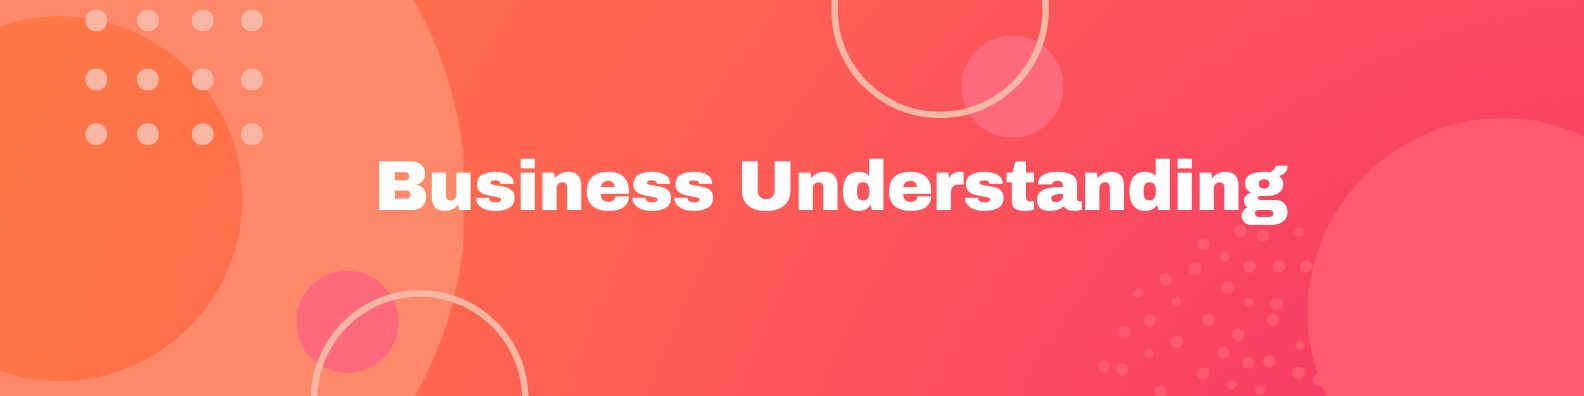

## Business Understanding
Understanding the client's needs and project objectives is fundamental in data mining projects. This initial phase focuses on understanding the objectives and requirements of the project from a business perspective. Key tasks include:

### Defining business objectives  
   From a technical perspective, the main goal is to develop a machine learning model that can accurately predict age categories based on various health indicators from the dataset. This will help healthcare providers in tailoring health interventions more effectively and understanding health trends across different age demographics.

### Assessing the current situation:  
  Healthcare providers are facing significant challenges in diagnosing and managing age-related diseases efficiently. There's a crucial need for better tools to predict health issues across different age groups, which can help in customizing healthcare strategies and improving outcomes. (fonte: doi.org/10.1186/s12911-019-0918-5)

### Determining data mining goals  
   The sucess in this project will be measured by the accuracy and usability of the age prediction model. High accuracy would indicate that our model can reliably categorize individuals into age groups, beeing important for studies and health programs that focus on different age groups.

### Producing a project plan  
    **Phase 1: Data Preparation** - Cleaning and preparing data for modeling.  
    **Phase 2: Dat Modeling** - Developing and training the predictive model.  
    **Phase 3: Evaluation** - Assessing the model's performance against our success criteria.  
  
### Resources
    **Data**: Access to the comprehensive NHANES dataset, which includes detailed health and nutrition data.
    **Technology**: Utilization of Python and its libraries for data processing and machine learning.

### Risks and Contingencies
    **Data Quality**: Potential issues with missing or inconsistent data that could impact model accuracy.
    **Model Complexity**: Creating models that are complex might be difficult to explain to non-technical stakeholders.

 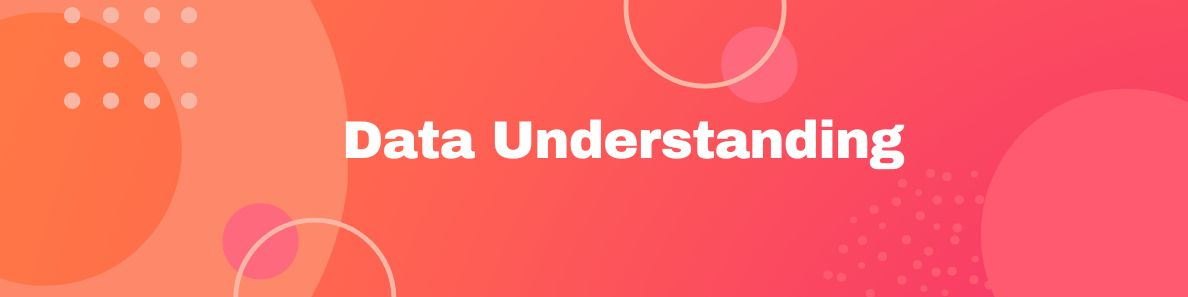

## Data Understanding  

This task involves a deeper investigation of the dataset, visualize some aspects of the dataset by plot and try to uncover relationships between different features.

#### Features
1. **SEQN (Sequence Number)**: A unique identifier assigned to each participant in the survey.

2. **age_group**: A categorical descriptor of the participant's age. The participants over 65 years old were labeled  as “senior” and all participants under 65 years old as “adults”
  
3. **RIDAGEYR (Respondent Age in Years)**: The exact age of the respondent at the time of the survey.
  
4. **RIAGENDR (Respondent Gender)**: Gender of the respondent, encoded as 1 for male and 2 for female.

5. **PAQ605 (Physical Activity)**: Indicates the level of physical activity, possibly categorized into levels like active and inactive. 1 represents that the respondent takes part in weekly moderate or vigorous-intensity physical activity and a 2 represents that they do not

6. **BMXBMI (Body Mass Index)**: A calculated value from height and weight (kg/m^2) indicating the body fat and overall obesity level of the individual.

7. **LBXGLU (Plasma Glucose Level)**: Measurement of glucose concentration in the blood, a key indicator of blood sugar levels.

8. **DIQ010 (Diabetes Indicator)**: Indicates whether the respondent has diabetes (1 for Yes, 2 for No, 3 for Borderline).

9. **LBXGLT (Glucose Tolerance Test)**: Results from an oral glucose tolerance test which helps determine how quickly glucose is cleared from the blood.

10. **LBXIN (Insulin Level)**: The level of insulin in the blood measured in µU/mL, which is critical for regulating blood glucose levels.

In [63]:
data = pd.read_csv('NHANES_age_prediction.csv')

# Displaying the first few rows of the dataset to confirm successful loading
data.head(4)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15


In [64]:
# Displaying general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [65]:
# Displaying the summary statistics of the dataset
summary_statistics = data.describe().round(1)
summary_statistics

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.0,2278.0,2278.0,2278.0,2278.0,2278.0,2278.0,2278.0,2278.0
mean,78691.9,41.8,1.5,1.8,28.0,99.6,2.0,115.0,11.8
std,2921.4,20.2,0.5,0.4,7.2,17.9,0.2,47.1,9.7
min,73564.0,12.0,1.0,1.0,14.5,63.0,1.0,40.0,0.1
25%,76171.8,24.0,1.0,2.0,22.8,91.0,2.0,87.0,5.9
50%,78749.0,41.0,2.0,2.0,26.8,97.0,2.0,105.0,9.0
75%,81213.5,58.0,2.0,2.0,31.2,104.0,2.0,130.0,14.4
max,83727.0,80.0,2.0,7.0,70.1,405.0,3.0,604.0,102.3


In [66]:
# Selecting the numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

 # Removing 'SEQN' column from the numeric_columns (doesn't provide any statistical information)
numeric_columns = numeric_columns.drop("SEQN")
numeric_columns

Index(['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
       'LBXGLT', 'LBXIN'],
      dtype='object')

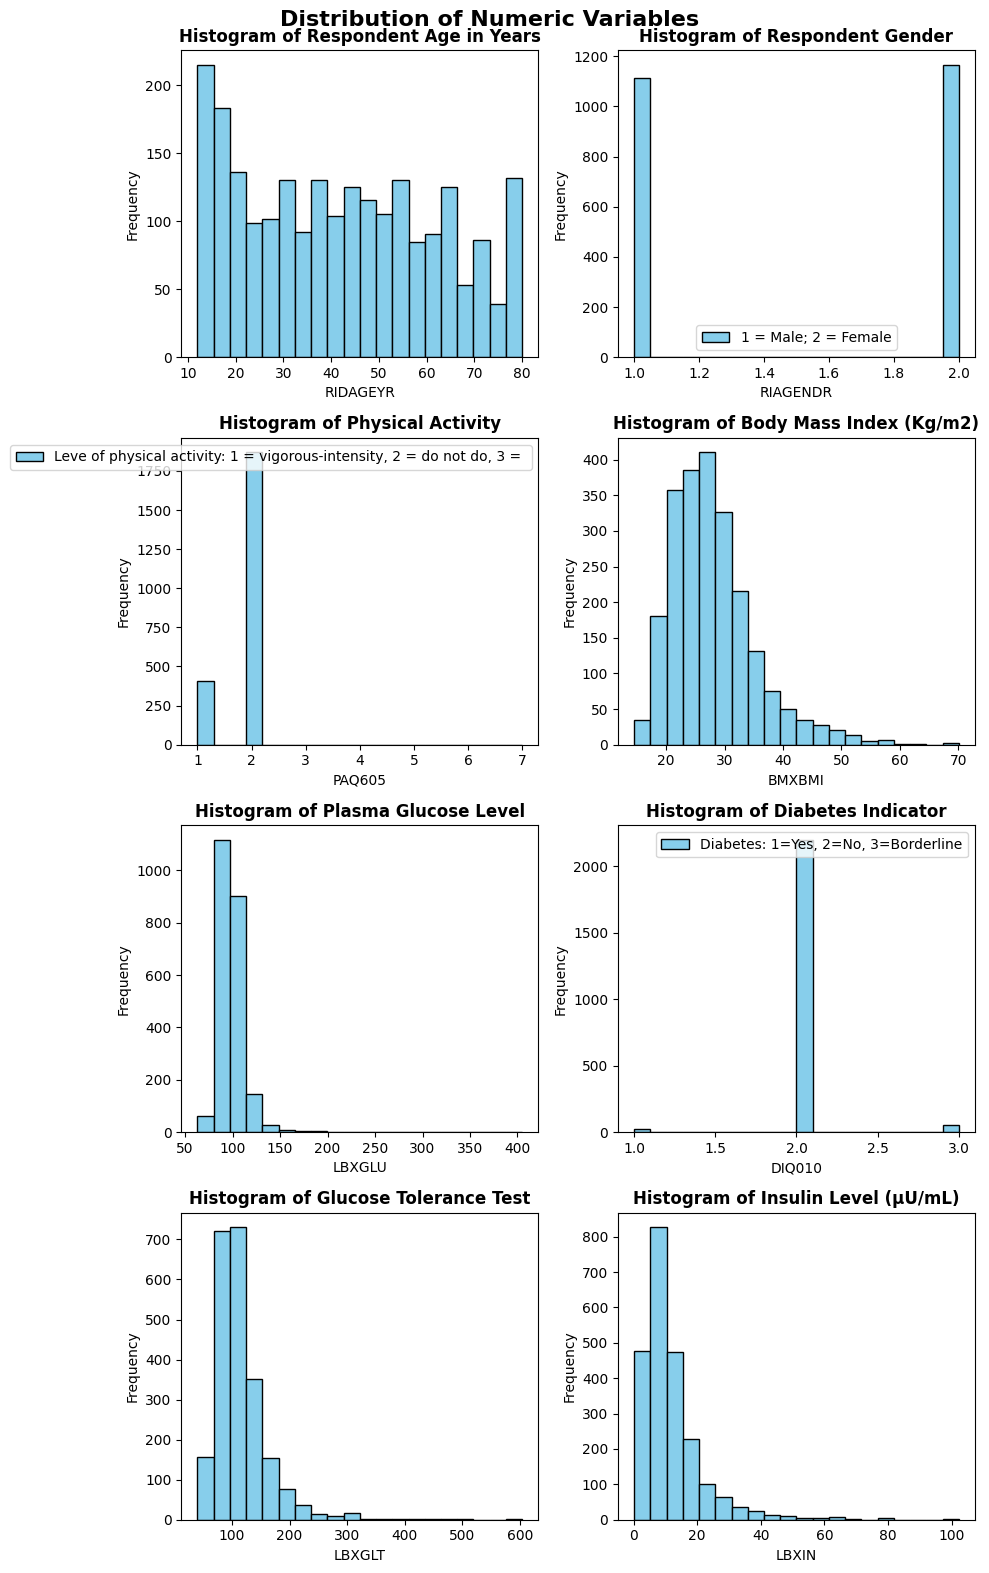

In [67]:
legend_numeric_columns = {
    'RIDAGEYR': 'Respondent Age in Years',
    'RIAGENDR': 'Respondent Gender',
    'PAQ605': 'Physical Activity',
    'BMXBMI': 'Body Mass Index (Kg/m2)',
    'LBXGLU': 'Plasma Glucose Level',
    'DIQ010': 'Diabetes Indicator',
    'LBXGLT': 'Glucose Tolerance Test',
    'LBXIN': 'Insulin Level (µU/mL)'}

# Creating figures and axes with 2 columns and 4 rows
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 16))
plt.suptitle('Distribution of Numeric Variables', fontsize=16, fontweight='bold')

# Iterating over the numeric columns and their respective axes to plot histograms
for ax, column in zip(axes.flatten(), legend_numeric_columns.keys()):
    ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {legend_numeric_columns[column]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    if column == 'RIAGENDR':
        ax.legend(['1 = Male; 2 = Female'])
    elif column == 'PAQ605':
        ax.legend(['Leve of physical activity: 1 = vigorous-intensity, 2 = do not do, 3 = '])
    elif column == 'DIQ010':
        ax.legend (['Diabetes: 1=Yes, 2=No, 3=Borderline'])
plt.tight_layout()
plt.show()

### Analyzing the graphs above, it's possible to make some assumptions:

**Histogram of Respondent Age in Years:** The data spans a range of age groups, with frequencies varying across different ages. There are noticeable peaks at certain age groups (between 10 - 20 years old), suggesting that these age ranges are more prevalently surveyed or have higher population densities.

**Histogram of Respondent Gender:** The gender distribution indicates two distinct categories (male = 1 and female = 2). The second category (female) has a notably higher frequency, suggesting that there might be more female respondents than male in this dataset.

**Histogram of Physical Activity:** This plot shows that most respondents report the lowest category, implying minimal engagement in physical activities among the surveyed population. This low levels of physical activity reported might correlate with other health metrics like BMI and diabetes.

**Histogram of Body Mass Index (BMI):** The BMI histogram reveals that a larger portion of the surveyed population has a BMI in the lower to middle range. Although, there's also a significant number of individuals with higher BMI, hinting at potential issues with overweight and obesity.

**Histogram of Plasma Glucose Level:** The graph shows that most respondents have glucose levels in the lower ranges, which are typical for healthy individuals. But there is a tail extending towards higher glucose levels, which could be indicative of glucose regulation issues in a subset of the population.

**Histogram of Diabetes Indicator**: This histogram indicates the presence or absence of diabetes. The overwhelming majority of respondents do not have diabetes, with a small proportion indicating a positive diabetes status.

**Histogram of Glucose Tolerance Test:** The glucose tolerance test results are spread across a wide range of values but are heavily skewed towards lower outcomes. The long tail towards higher values suggests that a segment of the population exhibits impaired glucose tolerance.

**Histogram of Insulin Level:** The distribution shows that with most individuals at lower insulin levels and a tail extending towards higher levels. This pattern may reflect normal variations in insulin but could also signal underlying metabolic conditions in some respondents.

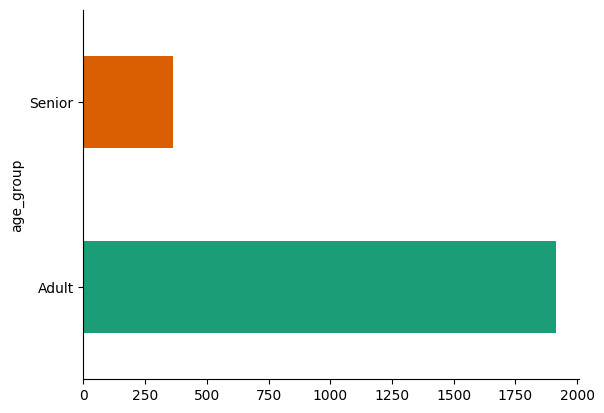

In [68]:
# @title age_group
data.groupby('age_group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The Age Group Bar Chart, visualizes the distribution of two age groups: "Senior" and "Adult". This bar chart shows that there are significantly more adults than seniors in the dataset, indicating a potential skew in the age distribution, which could influence model training and prediction.

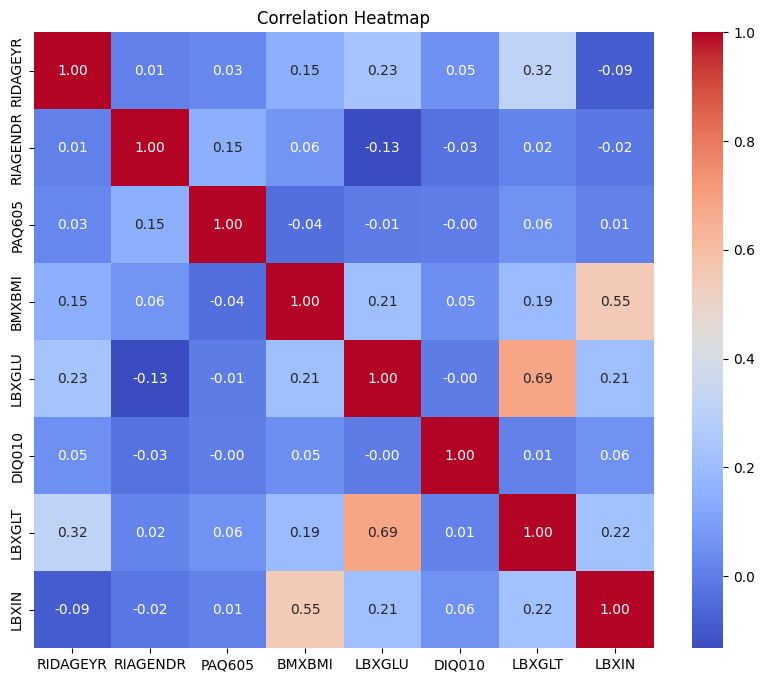

In [69]:
# Convert relevant columns to numeric
data[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']] = data[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']].apply(pd.to_numeric)

# Select columns for heatmap
heatmap_data = data[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]

# Compute correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The Correlation Heatmap illustrates the correlation between different variables in the dataset. It highlights the relationships between variables, such as a strong correlation between LBXGLU (glucose level) and LBXGLT, and a notable correlation between BMXBMI (BMI) and LBXIN (insulin).

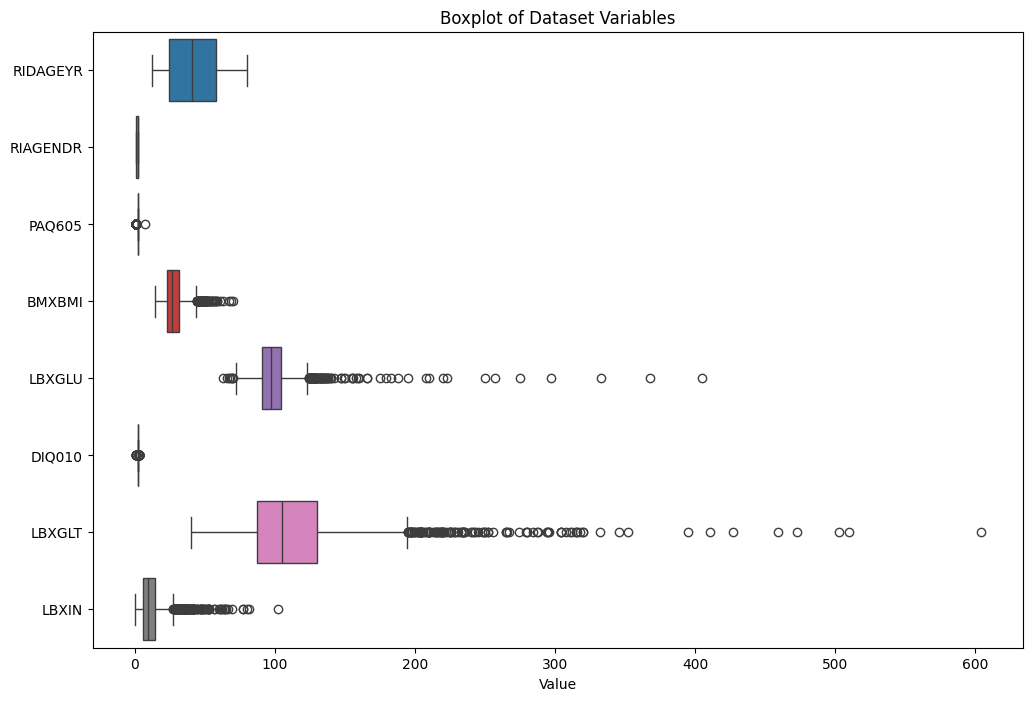

In [70]:
# Select columns for boxplot
boxplot_data = data[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data, orient='h')
plt.title('Boxplot of Dataset Variables')
plt.xlabel('Value')
plt.show()

The Boxplot of Dataset Variables (with Outliers) visualizes the distribution and outliers of various variables in the dataset. It shows the presence of outliers in several variables such as LBXGLU and BMXBMI, which can impact the model’s performance.

In [71]:
# Check for missing values
missing_values = data.isnull()

# Count missing values by column
missing_values_count = missing_values.sum()

print("Missing Values by Column:")
print(missing_values_count)


Missing Values by Column:
SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


In [72]:
# Define the columns to check for outliers
outlier_columns = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Initialize a dictionary to hold outlier counts
outliers_count = {}

# Loop through each column to find outliers
for column in outlier_columns:
    # Calculate Q1 and Q3 and the interquartile range
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = data.shape[0]

    # Store the count or percentage of outliers
    outliers_count[column] = {
        'Count': outlier_count,
        'Percentage': 100 * outlier_count / total_count
    }

# Print the results
for column, counts in outliers_count.items():
    print(f"{column} - Outliers: {counts['Count']} ({counts['Percentage']:.2f}%)")

RIDAGEYR - Outliers: 0 (0.00%)
RIAGENDR - Outliers: 0 (0.00%)
PAQ605 - Outliers: 410 (18.00%)
BMXBMI - Outliers: 88 (3.86%)
LBXGLU - Outliers: 104 (4.57%)
DIQ010 - Outliers: 79 (3.47%)
LBXGLT - Outliers: 121 (5.31%)
LBXIN - Outliers: 150 (6.58%)


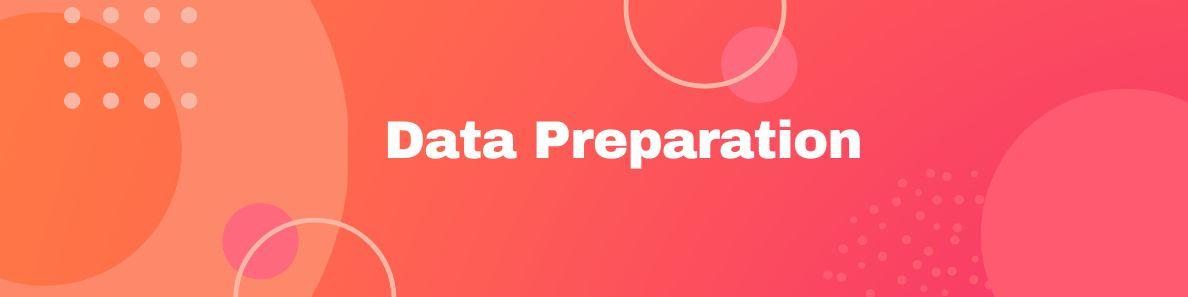

In [73]:
# Drop the ID column (assuming it's named 'SEQN')
data_cleaned = data.drop(columns=['SEQN'])

# Print the DataFrame without the ID column
print(data_cleaned.head())

  age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1     Adult      26.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2     Adult      16.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3     Adult      32.0       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4     Adult      38.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92


In [74]:
# Specify the columns for winsorization
columns_to_winsorize = ['PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Apply winsorization to handle outliers
data_cleaned[columns_to_winsorize] = data[columns_to_winsorize].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

In [75]:
# Define the columns to check for outliers
outlier_columns = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Initialize a dictionary to hold outlier counts
outliers_count = {}

# Loop through each column to find outliers
for column in outlier_columns:
    # Calculate Q1 and Q3 and the interquartile range
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = len(data_cleaned)

    # Store the count and percentage of outliers
    outliers_count[column] = {
        'Count': outlier_count,
        'Percentage': 100 * outlier_count / total_count
    }

# Print the results
for column, counts in outliers_count.items():
    print(f"{column} - Outliers: {counts['Count']} ({counts['Percentage']:.2f}%)")


RIDAGEYR - Outliers: 0 (0.00%)
RIAGENDR - Outliers: 0 (0.00%)
PAQ605 - Outliers: 409 (17.95%)
BMXBMI - Outliers: 0 (0.00%)
LBXGLU - Outliers: 0 (0.00%)
DIQ010 - Outliers: 0 (0.00%)
LBXGLT - Outliers: 121 (5.31%)
LBXIN - Outliers: 150 (6.58%)


In [76]:
# Select columns with potential outliers
columns_with_outliers = ['PAQ605', 'LBXGLT', 'LBXIN']

# Apply logarithmic transformation to handle outliers
for column in columns_with_outliers:
    # Add a small constant to avoid taking the logarithm of zero or negative values
    data_cleaned[column] = np.log(data_cleaned[column] + 1)



In [77]:
# Define the columns to check for outliers
outlier_columns = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Initialize a dictionary to hold outlier counts
outliers_count = {}

# Loop through each column to find outliers
for column in outlier_columns:
    # Calculate Q1 and Q3 and the interquartile range
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = data_cleaned.shape[0]

    # Store the count or percentage of outliers
    outliers_count[column] = {
        'Count': outlier_count,
        'Percentage': 100 * outlier_count / total_count
    }

# Print the results
for column, counts in outliers_count.items():
    print(f"{column} - Outliers: {counts['Count']} ({counts['Percentage']:.2f}%)")

RIDAGEYR - Outliers: 0 (0.00%)
RIAGENDR - Outliers: 0 (0.00%)
PAQ605 - Outliers: 409 (17.95%)
BMXBMI - Outliers: 0 (0.00%)
LBXGLU - Outliers: 0 (0.00%)
DIQ010 - Outliers: 0 (0.00%)
LBXGLT - Outliers: 0 (0.00%)
LBXIN - Outliers: 0 (0.00%)


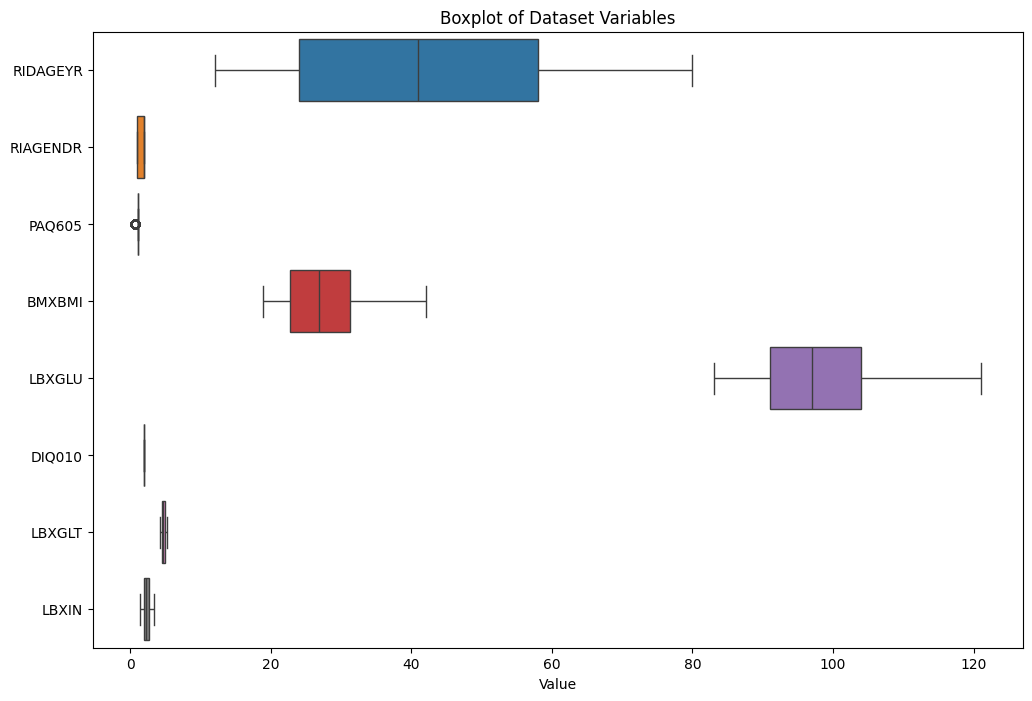

In [78]:
# Select columns for boxplot
boxplot_data = data_cleaned[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data, orient='h')
plt.title('Boxplot of Dataset Variables')
plt.xlabel('Value')
plt.show()


The Boxplot of Dataset Variables (without Outliers) presents the distribution of dataset variables after outliers have been addressed or removed. The data appears more normally distributed.

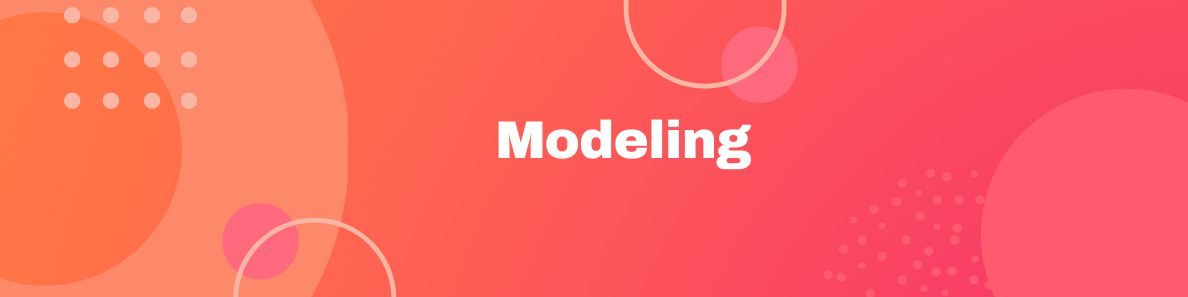

In [79]:
# Define features and target variable
X = data_cleaned.drop(columns=['age_group'])
y = data_cleaned['age_group']

print("First few rows of X:")
print(X.head())

print("\nFirst few elements of y:")
print(y.head())

First few rows of X:
   RIDAGEYR  RIAGENDR    PAQ605  BMXBMI  LBXGLU  DIQ010    LBXGLT     LBXIN
0      61.0       2.0  1.098612    35.7   110.0     2.0  5.017280  2.766948
1      26.0       2.0  1.098612    20.3    89.0     2.0  4.394449  1.578979
2      16.0       1.0  1.098612    23.2    89.0     2.0  4.234107  1.965713
3      32.0       1.0  1.098612    28.9   104.0     2.0  4.442651  2.841998
4      38.0       2.0  0.693147    35.9   103.0     2.0  4.406719  2.478218

First few elements of y:
0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: age_group, dtype: object


In [80]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("First few rows of X:")
print(X.head())

print("\nFirst few elements of y:")
print(y[:20])

First few rows of X:
   RIDAGEYR  RIAGENDR    PAQ605  BMXBMI  LBXGLU  DIQ010    LBXGLT     LBXIN
0      61.0       2.0  1.098612    35.7   110.0     2.0  5.017280  2.766948
1      26.0       2.0  1.098612    20.3    89.0     2.0  4.394449  1.578979
2      16.0       1.0  1.098612    23.2    89.0     2.0  4.234107  1.965713
3      32.0       1.0  1.098612    28.9   104.0     2.0  4.442651  2.841998
4      38.0       2.0  0.693147    35.9   103.0     2.0  4.406719  2.478218

First few elements of y:
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0]


In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first few rows of the training set after normalization
print("\nFirst few rows of X_train after normalization:")
print(X_train[:5])

print("\nFirst few elements of y_train:")
print(y_train[:5])


First few rows of X_train after normalization:
[[-1.04124442 -1.02557389  0.46506815 -1.10475242  0.05835656  0.
  -1.31803928 -0.18163261]
 [ 1.69763537 -1.02557389  0.46506815  0.0570112   0.15942657  0.
   2.05414362 -1.30017817]
 [-1.04124442  0.97506383 -2.1502225   0.18432776 -0.6491335   0.
  -1.13766543 -0.28559464]
 [ 1.64783756 -1.02557389  0.46506815  1.77578477 -0.95234353  0.
   0.16258442  1.00354267]
 [-0.14488376  0.97506383  0.46506815 -0.00664708  0.05835656  0.
   0.71641812 -0.76848586]]

First few elements of y_train:
[0 1 0 1 0]


In [82]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))



KNN Accuracy: 0.9473684210526315
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       382
           1       0.90      0.76      0.82        74

    accuracy                           0.95       456
   macro avg       0.93      0.87      0.90       456
weighted avg       0.95      0.95      0.95       456



In [83]:
# SVM Classifier

# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear')
# Train the SVM classifier
svm.fit(X_train, y_train)
# Predict the test set results
y_pred_svm = svm.predict(X_test)

# Print the accuracy of the SVM classifier
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
# Print the classification report of the SVM classifier
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.993421052631579
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       382
           1       1.00      0.96      0.98        74

    accuracy                           0.99       456
   macro avg       1.00      0.98      0.99       456
weighted avg       0.99      0.99      0.99       456



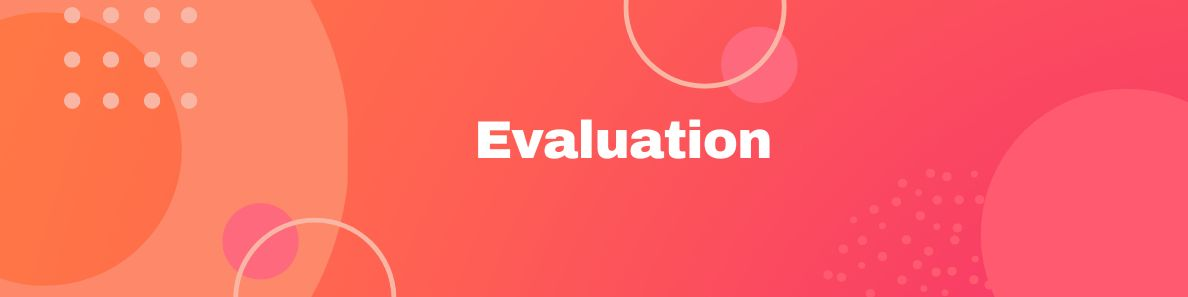

In [84]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [85]:
# Cross-Validation and Hyperparameter Tuning for KNN
# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform cross-validation
cv_scores_knn = cross_val_score(knn, X_train_poly, y_train, cv=5)

# Print cross-validation scores and the mean score
print("KNN Cross-validation scores:", cv_scores_knn)
print("KNN Mean cross-validation score:", cv_scores_knn.mean())

KNN Cross-validation scores: [0.93150685 0.9369863  0.92032967 0.9532967  0.93406593]
KNN Mean cross-validation score: 0.9352370916754479


In [86]:
# Hyperparameter Tuning for KNN
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the Grid Search for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation score for KNN:", grid_search_knn.best_score_)

# Use the best estimator to make predictions
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate the tuned KNN model
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Classification Report for Tuned KNN:\n", classification_report(y_test, y_pred_best_knn))


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for KNN: 0.952255005268704
Tuned KNN Accuracy: 0.9517543859649122
Classification Report for Tuned KNN:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       382
           1       0.91      0.78      0.84        74

    accuracy                           0.95       456
   macro avg       0.93      0.88      0.91       456
weighted avg       0.95      0.95      0.95       456



In [87]:
# Cross-Validation and Hyperparameter Tuning for SVM
# Initialize the SVM model
svm = SVC(kernel='linear')

# Perform cross-validation
cv_scores_svm = cross_val_score(svm, X_train_poly, y_train, cv=5)

# Print cross-validation scores and the mean score
print("SVM Cross-validation scores:", cv_scores_svm)
print("SVM Mean cross-validation score:", cv_scores_svm.mean())

SVM Cross-validation scores: [0.98082192 0.99452055 0.98351648 0.99725275 0.98901099]
SVM Mean cross-validation score: 0.9890245371067289


In [88]:
# Hyperparameter Tuning for SVM
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the Grid Search for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

# Use the best estimator to make predictions
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Evaluate the tuned SVM model
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best_svm))
print("Classification Report for Tuned SVM:\n", classification_report(y_test, y_pred_best_svm))


Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM: 0.9983516483516484
Tuned SVM Accuracy: 1.0
Classification Report for Tuned SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



Baseline Accuracy: 0.8377192982456141
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       382
           1       0.00      0.00      0.00        74

    accuracy                           0.84       456
   macro avg       0.42      0.50      0.46       456
weighted avg       0.70      0.84      0.76       456

Baseline Confusion Matrix:
 [[382   0]
 [ 74   0]]


C:\Users\Dell\anaconda3\envs\ISLP\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\envs\ISLP\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\envs\ISLP\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


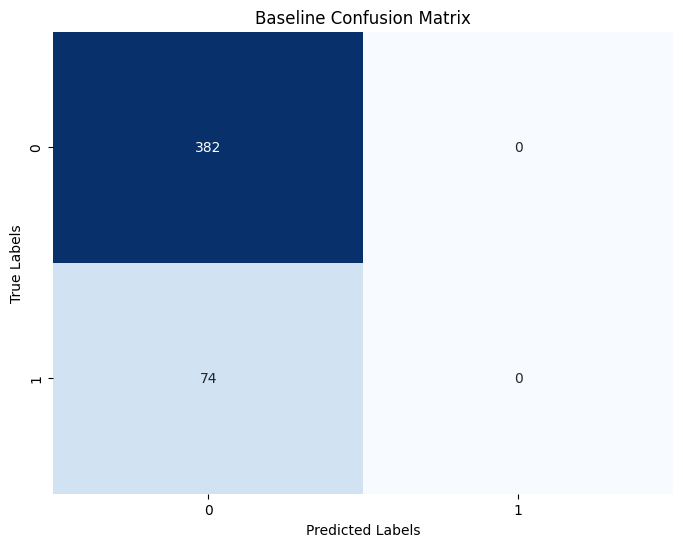

Baseline Accuracy: 0.8377192982456141
Tuned SVM Accuracy: 1.0


In [89]:
# 1. Train a Baseline Predictor
# Initialize a majority class classifier as a baseline predictor
baseline_classifier = DummyClassifier(strategy="most_frequent")

# Train the baseline classifier
baseline_classifier.fit(X_train, y_train)

# 2. Performance Metrics
# Predictions of the baseline classifier
y_pred_baseline = baseline_classifier.predict(X_test)

# Evaluate accuracy of the baseline classifier
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_accuracy)

# Generate classification report for the baseline classifier
print("Baseline Classification Report:\n", classification_report(y_test, y_pred_baseline))

# Generate confusion matrix for the baseline classifier
baseline_conf_matrix = confusion_matrix(y_test, y_pred_baseline)
print("Baseline Confusion Matrix:\n", baseline_conf_matrix)

# 3. Visualizations
# Confusion matrix heatmap for baseline classifier
plt.figure(figsize=(8, 6))
sns.heatmap(baseline_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Baseline Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Compare baseline accuracy with tuned model accuracies
print("Baseline Accuracy:", baseline_accuracy)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best_svm))
# Print accuracy of other tuned models as well

The Baseline Confusion Matrix evaluates the performance of the baseline model, which predicts only one class (0). The matrix reveals that the baseline model fails to predict class 1 correctly, indicating poor performance and highlighting the need for more sophisticated models to improve prediction accuracy.

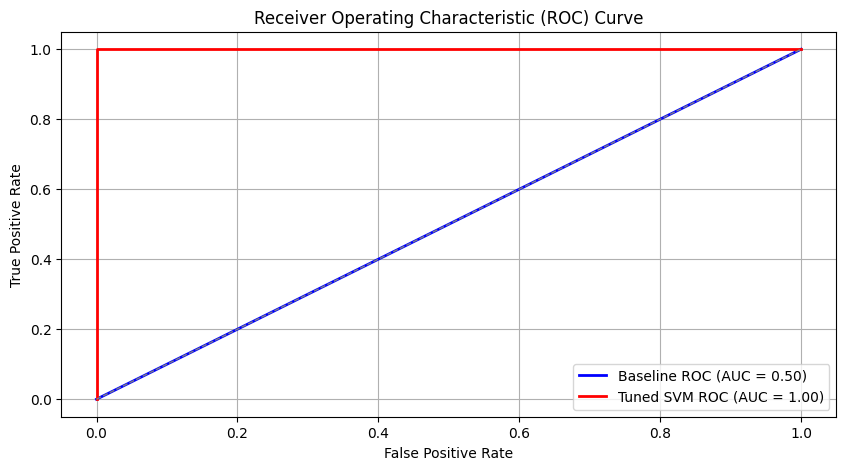

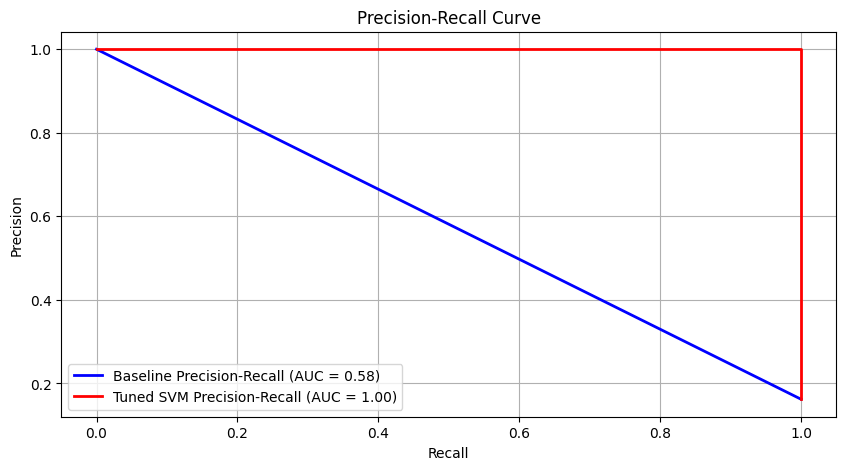

In [90]:
# Compute probabilities for the baseline classifier
y_proba_baseline = baseline_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve for the baseline classifier
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_proba_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

# Compute precision-recall curve for the baseline classifier
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_proba_baseline)
pr_auc_baseline = auc(recall_baseline, precision_baseline)

# Compute probabilities for the tuned SVM classifier
y_proba_svm = best_svm.decision_function(X_test)

# Compute ROC curve for the tuned SVM classifier
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Compute precision-recall curve for the tuned SVM classifier
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_proba_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2, label=f'Baseline ROC (AUC = {roc_auc_baseline:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'Tuned SVM ROC (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot precision-recall curves
plt.figure(figsize=(10, 5))
plt.plot(recall_baseline, precision_baseline, color='blue', lw=2, label=f'Baseline Precision-Recall (AUC = {pr_auc_baseline:.2f})')
plt.plot(recall_svm, precision_svm, color='red', lw=2, label=f'Tuned SVM Precision-Recall (AUC = {pr_auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

The ROC Curve (Receiver Operating Characteristic Curve) compares the baseline model and the tuned SVM model. The tuned SVM model (red line) achieves a perfect AUC (Area Under Curve) of 1.0, signifying excellent predictive performance, while the baseline model (blue line) has an AUC of 0.50, indicating it performs no better than random guessing. This underscores the effectiveness of the SVM model after tuning.